Importing the necessary packages.

In [1]:
import numpy as np
import sep
import astropy.io
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
    # Only necessary packages imported according to https://learn.astropy.org/FITS-images.html.

%matplotlib inline
    # Classic show matplotlib inline.

rcParams['figure.figsize'] = [10. , 8.]
    # Set maximum X and Y sizes of matplotlib.pyplot inline displays.

Import "image.fits" into a 2D numpy array, extracted using astropy.io.fits.

In [2]:
image = fits.open('D:/Education/UCSC FA2020/ASTR 119/Projects/Final/image.fits')
    # astropy.io.fits.open() replaces fitsio.read() in terms of functionality.
data = image[0].data
    # astropy.io.fits.open() gives a list, and the first(0) element in that list is the relevant 2-D numpy array.

# These pieces of instruction were pulled from https://learn.astropy.org/FITS-images.html.

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


Show the image.

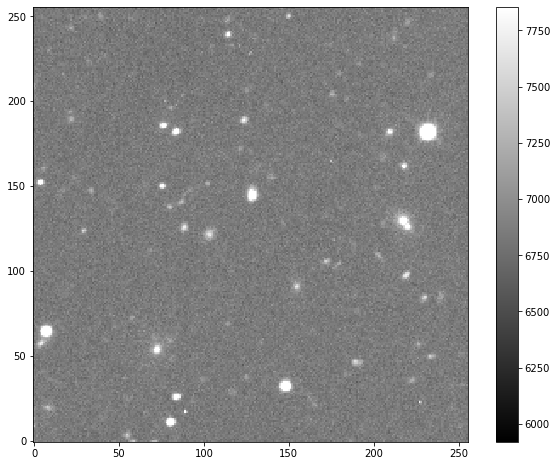

In [3]:
m = np.mean(data)
    # Recall that data is a 2-D numpy array of luminosity values.
    # Take the mean of all luminosity values.
s = np.std(data)
    # Take the standard deviation of all luminosity values.

plt.imshow(data , interpolation='nearest' , cmap='gray' , vmin=m-s , vmax=m+s , origin='lower')
    # Show all data, with shading limits of 1 standard deviation from mean.
plt.colorbar()
    # Show scale on the right. Maximum to minimum, background noise is roughly on scale of 1 000 brightness units.
plt.savefig('data.png' , bbox_inches='tight' , dpi=300)
    # The file that appears in your directory should be named "data.png" and should be 241 KB in size.

Measure a spatially varying background on the image.

In [4]:
bkg = sep.Background(data)
    # sep.Background() probably does background stuff.
    # I have no idea how it does it though.
    # After 8 minutes of messing around, it is literally just shorthand.
    # I can use sep.Background(data).globalback instead of bkg.globalback.
    # I still have no idea how it does what it does.

Get a "global" mean and noise of the image background:

In [5]:
print(sep.Background(data).globalback)
print(sep.Background(data).globalrms)
    # These values probably mean something relevant.
    # They probably do what they do.
    # It does.

6852.04931640625
65.46174621582031


bkg.globalback will be interpreted as a 256x256 2-D numpy array.

In [6]:
bkg_image = sep.Background(data).back()
    # sep.Background(data).back() returns a relevant 2-D numpy array of values.
    # Again, not going to use shorthand in the best pursuit of clarity.

Show the background.

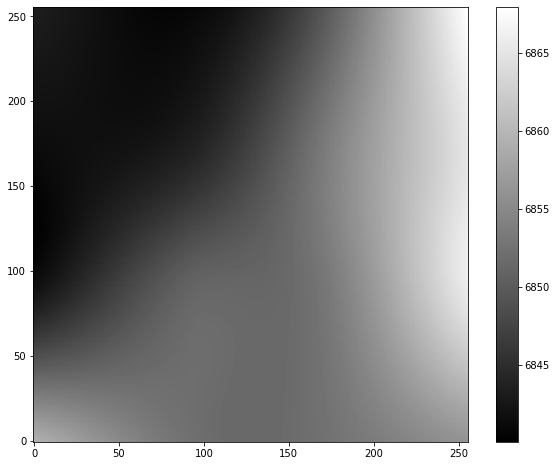

In [7]:
plt.imshow(sep.Background(data).back() , interpolation='nearest' , cmap='gray' , origin='lower')
    # Some matlib.pyplot stuff.
plt.colorbar()
    # Colorscale has a magnitude of about 12 brightness units now.
plt.savefig('background.png' , bbox_inches='tight' , dpi=300)
    # The figure that appears in your directory should be named "background.png" and should be 88 KB in size.

bkg.globalrms will be interpreted as a 256x256 2-D numpy array.

In [8]:
bkg_rms = bkg.rms()
    # Uhh what.
    # sep.Background(data).rms() ?
    # After 30 seconds of testing, I can confirm that bkg.rms() = sep.Background(data).rms().
    # For clarity, shorthand will be discarded.

Show the background noise.

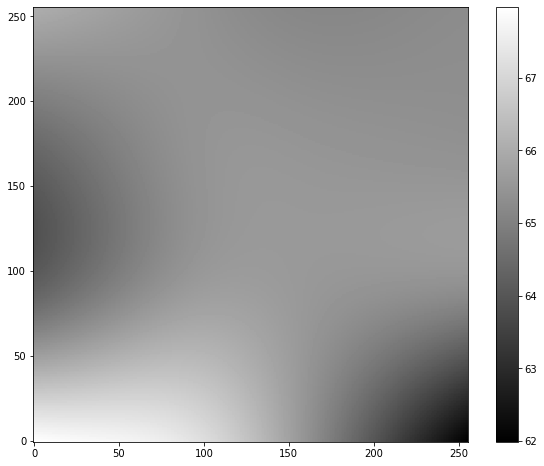

In [9]:
plt.imshow(sep.Background(data).rms() , interpolation='nearest' , cmap='gray' , origin='lower')
    # matplotlib.pyplot stuff again.
plt.colorbar()
    # Colorscale now at a pathetic 3 luminosity units.
plt.savefig('background-noise.png' , bbox_inches='tight' , dpi=300)
    # The figure that appears in your directory should be named "background-noise.png" and should be 77 KB in size.

Subtract the background from the data.

In [10]:
data_sub = data - sep.Background(data)
    # Recall that bkg = sep.Background(data).
    # Take the data and subtract the background from it. This probably enhances the clarity of the data.

Begin object detection.

In [11]:
objects = sep.extract(data_sub , 1.5 , err=sep.Background(data).globalrms)
    # sep.extract() probably needs arguments or whatever. It spits out a list of statistics or stuff.
    # Not too sure. It does what it does.

Show how many objects were detected.

In [12]:
len(objects)
    # Nice.

69

Plot the background-subtracted image, then plot ellipses around each detected object.

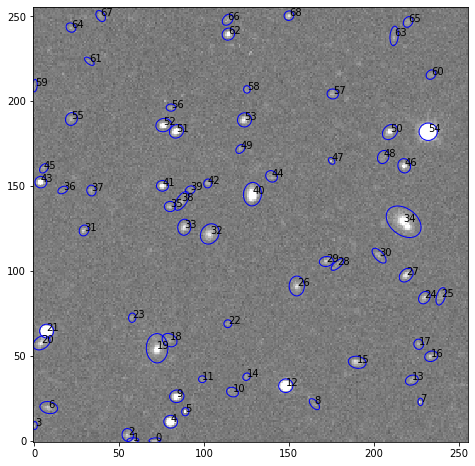

In [13]:
fig, ax = plt.subplots()
    # matplotlib.pyplot.subplots() returns two values.

m = np.mean(data_sub)
    # Take the mean of the subracted luminosity values.
s = np.std(data_sub)
    # Take the standard deviation of the subtracted luminosity values.

im = ax.imshow(data_sub , interpolation='nearest' , cmap='gray' ,vmin=m-s , vmax=m+s , origin='lower')
    # Show all subtracted data, with shading limits of 1 standard deviation from mean.
    # ax.imshow() = plt.imshow() ?
    # The substitution to call the function here is a little hard for me to understand.

for i in range(len(objects)):

    e = Ellipse(
        xy = (objects['x'][i] , objects['y'][i] ),
            # Set ellipse center.
        width = 6 * objects['a'][i],
            # Set ellipse width.
        height = 6 * objects['b'][i],
            # Set ellipse height.
        angle = objects['theta'][i] * 180./np.pi
            # Rotate ellipse.
    )
        # Ellipse( xy , width , height , angle ) makes an ellipse! Amazing!

    e.set_facecolor('none')
        # To make sure the ellipse does not obscure the actual object.
    e.set_edgecolor('blue')
        # The outline of the ellipse will be blue, because our diagram is in the greyscale.
    
    ax.add_artist(e)
        # This does what it does. I do not know what it does.
    
    plt.annotate(i , xy=[objects['x'][i] , objects['y'][i]])
        # Did you really expect me to put ellipese around the objects WITHOUT labelling them? Indexed from 0-68.

plt.savefig('complete.png' , bbox_inches='tight' , dpi=300)
    # The figure that appears in your directory should be named "complete.png" and should be 454 KB in size.

Perform circular aperture photometry with r = 3 pixels.

In [14]:
flux, fluxerr, flag = sep.sum_circle(data_sub , objects['x'] , objects['y'] , 3.0 , err=bkg.globalrms , gain=1.0)
    # sep.sum_circle() sums the inside of the ellipse to give the object's:
        # 1: Total flux.
        # 2: Error in flux calculations.
        # 3: Whatever flag means.

Show all object results.

In [15]:
for i in range(len(objects)):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))
        # For each i, print the flux and error.

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
object 10: flux = 2940.234180 +/- 351.585835
object 11: flux = 2135.050176 +/- 351.659584
object 12: flux = 263051.195430 +/- 619.177471
object 13: flux = 4205.270684 +/- 354.107137
object 14: flux = 2240.924668 +/- 351.566392
object 15: flux = 8921.247090 +/- 359.514663
object 16: flux = 5424.506680 +/- 355.342484
object 17: flux = 3408.620273 +/- 352.980473
object 18: flux = 4254.974551 +/- 353.693015
object 19: flux = 22778.135234 +/- 379.200896
object 20: flux = 11145.091387 +/- 362.830603
object 21: flux = 281617.316426 +/- 634.668347
object 22: f